# SkillFactory
## Введение в ML, введение в sklearn

В этом задании мы с вами рассмотрим данные с конкурса [Задача предсказания отклика клиентов ОТП Банка](http://www.machinelearning.ru/wiki/index.php?title=%D0%97%D0%B0%D0%B4%D0%B0%D1%87%D0%B0_%D0%BF%D1%80%D0%B5%D0%B4%D1%81%D0%BA%D0%B0%D0%B7%D0%B0%D0%BD%D0%B8%D1%8F_%D0%BE%D1%82%D0%BA%D0%BB%D0%B8%D0%BA%D0%B0_%D0%BA%D0%BB%D0%B8%D0%B5%D0%BD%D1%82%D0%BE%D0%B2_%D0%9E%D0%A2%D0%9F_%D0%91%D0%B0%D0%BD%D0%BA%D0%B0_%28%D0%BA%D0%BE%D0%BD%D0%BA%D1%83%D1%80%D1%81%29)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

### Грузим данные

Считаем описание данных

In [2]:

df_descr = pd.read_csv('data/otp_description.csv', sep='\t', encoding='utf8')

In [3]:
df_descr

,ПОЛЕ,ОПИСАНИЕ
0,AGREEMENT_RK,уникальный идентификатор объекта в выборке
1,AGE,возраст клиента
2,SOCSTATUS_WORK_FL,социальный статус клиента относительно работы ...
3,SOCSTATUS_PENS_FL,социальный статус клиента относительно пенсии ...
4,GENDER,"пол клиента (1- женщины, 0-мужчины)"
5,CHILD_TOTAL,количество детей клиента
6,DEPENDANTS,количество иждивенцев клиента
7,EDUCATION,образование
8,MARITAL_STATUS,семейное положение
9,GEN_INDUSTRY,отрасль работы клиента


Считаем обучающую выборки и тестовую (которую мы как бы не видим)

In [4]:
df_train = pd.read_csv('data/otp_train.csv', sep='\t', encoding='utf8')

In [5]:
df_train.shape

(15223, 52)

In [6]:
df_test = pd.read_csv('data/otp_test.csv', sep='\t', encoding='utf8')

In [7]:
df_test.shape

(14910, 52)

In [8]:
df_train.head()

,AGREEMENT_RK,TARGET,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,EDUCATION,MARITAL_STATUS,...,REG_PHONE_FL,GEN_PHONE_FL,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,LOAN_NUM_PAYM,LOAN_DLQ_NUM,LOAN_MAX_DLQ,LOAN_AVG_DLQ_AMT,LOAN_MAX_DLQ_AMT,PREVIOUS_CARD_NUM_UTILIZED
0,59910150,0,49,1,0,1,2,1,Среднее специальное,Состою в браке,...,0,1,1,1,6,2,1,1580,1580,NaN
1,59910230,0,32,1,0,1,3,3,Среднее,Состою в браке,...,0,1,1,1,6,1,1,4020,4020,NaN
2,59910525,0,52,1,0,1,4,0,Неполное среднее,Состою в браке,...,0,1,2,1,11,0,0,0,0,NaN
3,59910803,0,39,1,0,1,1,1,Высшее,Состою в браке,...,1,1,1,1,6,3,1,"1589,92333333333",1590,NaN
4,59911781,0,30,1,0,0,0,0,Среднее,Состою в браке,...,0,1,2,1,16,2,1,"1152,15",2230,NaN


## Объединим две выборки

Так как пока мы пока не умеем работать sklearn  Pipeline, то для того, чтобы после предобработки столбцы в двух выборках находились на своих местах.

Для того, чтобы в дальнейшем отделить их введем новый столбец "sample"

In [9]:
df_train.loc[:, 'sample'] = 'train'
df_test.loc[:, 'sample'] = 'test'

In [10]:
df = df_test.append(df_train).reset_index(drop=True)

In [11]:
df.shape
len(set(df.index))

30133

### Чуть-чуть посмотрим на данные

Посмотрим типы данных и их заполняемость

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30133 entries, 0 to 30132
Data columns (total 53 columns):
AGREEMENT_RK                  30133 non-null int64
TARGET                        30133 non-null int64
AGE                           30133 non-null int64
SOCSTATUS_WORK_FL             30133 non-null int64
SOCSTATUS_PENS_FL             30133 non-null int64
GENDER                        30133 non-null int64
CHILD_TOTAL                   30133 non-null int64
DEPENDANTS                    30133 non-null int64
EDUCATION                     30133 non-null object
MARITAL_STATUS                30133 non-null object
GEN_INDUSTRY                  27420 non-null object
GEN_TITLE                     27420 non-null object
ORG_TP_STATE                  27420 non-null object
ORG_TP_FCAPITAL               27425 non-null object
JOB_DIR                       27420 non-null object
FAMILY_INCOME                 30133 non-null object
PERSONAL_INCOME               30133 non-null object
REG_ADDRESS_PRO

Видим, что часть данных - object, скорее всего стоки.


Давайте выведем эти значения для каждого столбца

In [13]:
for i in df_train.columns: # перебираем все столбцы
    if str(df_train[i].dtype) == 'object': # если тип столбца - object
        print('='*10)
        print(i) # выводим название столбца
        print(list(set(df_train[i]))[:100]) # выводим все его значения (но делаем set - чтоб значения не повторялись)
        print('\n') # выводим пустую строку

EDUCATION
['Ученая степень', 'Неоконченное высшее', 'Неполное среднее', 'Среднее', 'Среднее специальное', 'Два и более высших образования', 'Высшее']


MARITAL_STATUS
['Вдовец/Вдова', 'Разведен(а)', 'Состою в браке', 'Гражданский брак', 'Не состоял в браке']


GEN_INDUSTRY
[nan, 'Салоны красоты и здоровья', 'Развлечения/Искусство', 'СМИ/Реклама/PR-агенства', 'Торговля', 'Образование', 'Информационные технологии', 'Недвижимость', 'Энергетика', 'Химия/Парфюмерия/Фармацевтика', 'Сельское хозяйство', 'Здравоохранение', 'Страхование', 'Другие сферы', 'Туризм', 'Подбор персонала', 'Наука', 'Юридические услуги/нотариальные услуги', 'Металлургия/Промышленность/Машиностроение', 'Строительство', 'Сборочные производства', 'Управляющая компания', 'Транспорт', 'Нефтегазовая промышленность', 'Маркетинг', 'Логистика', 'Банк/Финансы', 'Ресторанный бизнес/Общественное питание', 'ЧОП/Детективная д-ть', 'Государственная служба', 'Коммунальное хоз-во/Дорожные службы', 'Информационные услуги']


GEN_TITLE


Mожно заметить что некоторые переменные, которые обозначены как строки (например PERSONAL_INCOME) на самом деле числа, но по какой-то причине были распознаны как строки

Причина же что использовалась запятая для разделения не целой части числа..

Перекодировать их можно например так:

In [14]:
df['PERSONAL_INCOME'].map(lambda x: x.replace(',', '.')).astype('float')

0         7000.0
1         4100.0
2        40000.0
3        20000.0
4        17000.0
5         7000.0
6        10000.0
7         7500.0
8         9000.0
9         4000.0
10       15000.0
11       12000.0
12        8000.0
13       20000.0
14       18500.0
15       14000.0
16        6000.0
17        9000.0
18        5000.0
19       15000.0
20        6100.0
21       22180.0
22        9000.0
23        8700.0
24        7000.0
25        6000.0
26       15000.0
27       12000.0
28       11000.0
29        8000.0
          ...   
30103    12000.0
30104    10000.0
30105    10000.0
30106     8000.0
30107    11000.0
30108     7000.0
30109    10000.0
30110     8000.0
30111    25000.0
30112    10000.0
30113    12000.0
30114     7000.0
30115    12000.0
30116    14500.0
30117    12000.0
30118     8000.0
30119     7000.0
30120    10000.0
30121    10000.0
30122    10000.0
30123    15000.0
30124     8100.0
30125     9500.0
30126    13000.0
30127    10000.0
30128    12000.0
30129    10000.0
30130     6000

Такой эффект наблюдается в столбцах `PERSONAL_INCOME`, `CREDIT`, `FST_PAYMENT`, `LOAN_AVG_DLQ_AMT`, `LOAN_MAX_DLQ_AMT`

### Теперь ваше небольшое исследование

#### Задание 1. Есть ли пропуски в данных? Что с ними сделать?

(единственного верного ответа нет - аргументируйте)

Нам нужна нормальная численная матрица. Так что если численный признак заменить медианой, если нет выкинуть. Еще PREVIOUS_CARD_NUM_UTILIZED заменить на нули как написано в описании данных.

#### Задание 2. Есть ли категориальные признаки? Что с ними делать?

Закодировать OneHotEncoding например. Если же у них есть порядок (например образование),
может быть можно закодировать иначе, но я пока не знаю как. :)

#### Задание 3. Фунция предобработки

Напишите функцию, которая бы

* Удаляло идентификатор `AGREEMENT_RK`
* Избавлялась от проблем с '.' и ',' в стобцах PERSONAL_INCOME, CREDIT, FST_PAYMENT, LOAN_AVG_DLQ_AMT, LOAN_MAX_DLQ_AMT
* Что-то делала с пропусками
* Кодировала категориальные признаки

В результате, ваш датафрейм должен содержать только числа и не содержать пропусков!

In [15]:
df.shape

(30133, 53)

In [16]:
df[~df['PREVIOUS_CARD_NUM_UTILIZED'].isna()].shape

(600, 53)

In [17]:
def preproc_data(df_input):
    df_output = df_input.copy()
    
    df_output = df_output.drop('AGREEMENT_RK', axis=1)
    comma_fields = 'PERSONAL_INCOME, CREDIT, FST_PAYMENT, LOAN_AVG_DLQ_AMT, LOAN_MAX_DLQ_AMT'.split(', ')
    for field in comma_fields:
        df_output[field] = df[field].map(lambda x: x.replace(',', '.')).astype('float')
    columns = df_output.columns.drop('sample')
    for col in columns:
        if col == 'PREVIOUS_CARD_NUM_UTILIZED':
            df_output[col] = df_output[col].fillna(0)
        else:
            df_output = df_output[~df_output[col].isna()]
    categorical = df_output.select_dtypes(include=['object', 'category']).columns.drop('sample')
    df_output = pd.get_dummies(df_output, columns=categorical)
    
    return df_output

In [18]:
df_preproc = df.pipe(preproc_data)

In [19]:
df_preproc.shape

(26840, 443)

In [20]:
df_train_preproc = df_preproc.query('sample == "train"').drop(['sample'], axis=1)
df_test_preproc = df_preproc.query('sample == "test"').drop(['sample'], axis=1)

#### Задание 4. Отделите целевую переменную и остальные признаки

Должно получится:
* 2 матрицы: X и X_test
* 2 вектора: y и y_test

In [21]:
y = df_train_preproc['TARGET']
X = df_train_preproc.drop('TARGET', axis=1)
y_final_test = df_test_preproc['TARGET']
X_final_test = df_test_preproc.drop('TARGET', axis=1)

#### Задание 5. Обучение и оценка качества разных моделей

In [22]:
from sklearn.cross_validation import train_test_split
# test_size=0.3, random_state=42

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

/home/mtomilov/.local/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [23]:
# Попробовать следующие "черные ящики": интерфейс одинаковый 
# Постепенно мы узнаем, что они делают а сейчас учимся понимать какой работает качественнее
#     fit, 
#     predict, 
#     predict_proba

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

models = [DecisionTreeClassifier(), RandomForestClassifier(), LogisticRegression()]
predicts = []
predict_probas = []
for model in models:
    model.fit(X_train, y_train) 
    predicts.append(model.predict(X_test))
    predict_probas.append(model.predict_proba(X_test))

/home/mtomilov/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/mtomilov/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [35]:
# Посчитать метрики стандартные
# accuracy, precision, recall

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

## Your Code Here
dict_metrics = {}
for model, predict in zip(models, predicts):
    model_name = model.__class__.__name__
    print('model = {}'.format(model_name))
    dict_metrics[model_name] = []
    
    prec = precision_score(y_test, predict)
    print('precision:', prec)
    dict_metrics[model_name].append(prec)
    
    recall = recall_score(y_test, predict)
    print('recall:', recall)
    dict_metrics[model_name].append(recall)
    
    acc = accuracy_score(y_test, predict)
    print('accuracy:', acc)
    dict_metrics[model_name].append(acc)
    
    f1 = f1_score(y_test, predict)
    print('f1:', f1)
    dict_metrics[model_name].append(f1)
    print()

model = DecisionTreeClassifier
precision: 0.1646655231560892
recall: 0.19753086419753085
accuracy: 0.7845738147875215
f1: 0.17960710944808234

model = RandomForestClassifier
precision: 0.2727272727272727
recall: 0.006172839506172839
accuracy: 0.8793908130680422
f1: 0.012072434607645873

model = LogisticRegression
precision: 0.0
recall: 0.0
accuracy: 0.8801277327437976
f1: 0.0



In [42]:
df_metrics = pd.DataFrame(dict_metrics).T

In [43]:
df_metrics.columns = 'precision recall accuracy f1'.split()

In [44]:
df_metrics

,precision,recall,accuracy,f1
DecisionTreeClassifier,0.164666,0.197531,0.784574,0.179607
RandomForestClassifier,0.272727,0.006173,0.879391,0.012072
LogisticRegression,0.000000,0.000000,0.880128,0.000000


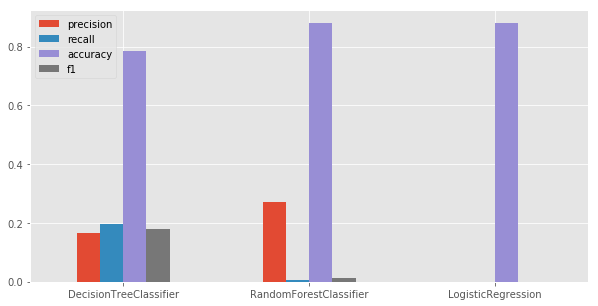

In [63]:
# Визуалищировать эти метрики всех моделей на одном графике (чтоб визуально сравнить)
# Возможно вас удивит качество! Но задача подобрана специально ;) Такое качество тоже бывает

## Your Code Here
%matplotlib inline
from matplotlib import pyplot as plt

df_metrics.plot(kind='bar', legend=True, figsize=(10, 5), rot=0)

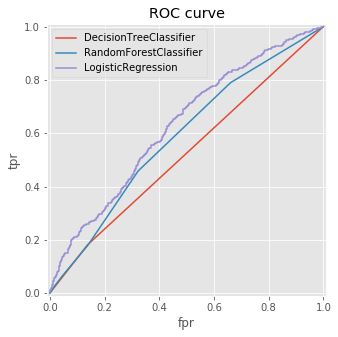

In [968]:
# Потроить roc-кривые всех можелей на одном графике
# Вывести roc_auc каждой моделе
# Подпишите оси и линии

## Your Code Here
from sklearn.metrics import roc_auc_score, roc_curve
plt.figure(figsize=(5, 5), facecolor='white')

for model, predict_proba in zip(models, predict_probas):
    fpr, tpr, thresholds = roc_curve(y_test, predict_proba[:,1])
    plt.plot(fpr, tpr)

plt.grid(True)
plt.title('ROC curve')
plt.legend([model.__class__.__name__ for model in models])
plt.ylabel('tpr')
plt.xlabel('fpr')
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))
pass

In [969]:
from sklearn.cross_validation import cross_val_score
# Сделать k-fold (10 фолдов) кросс-валидацию каждой модели
# И посчитать средний roc_auc

## Your Code Here
for model in models:
    print('model = {}'.format(model.__class__.__name__))
    cvs = cross_val_score(
        model,
        X,
        y,
        scoring='roc_auc',
        cv=10
    )
    print('average cvs: {}'.format(cvs.mean()))
    print()

model = DecisionTreeClassifier
average cvs: 0.5165621866841379

model = RandomForestClassifier
average cvs: 0.5823157668931767

model = LogisticRegression
average cvs: 0.6114977087731477



In [970]:
# Взять лучшую модель и сделать предсказания (с вероятностями (!!!)) для test выборки

## Your Code Here
model = LogisticRegression()
model.fit(X_train, y_train)
predict = model.predict(X_final_test)
predict_proba = model.predict_proba(X_final_test)

/home/mtomilov/.local/lib/python3.6/site-packages/sklearn/linear_model/base.py:340: RuntimeWarning: overflow encountered in exp
  np.exp(prob, prob)


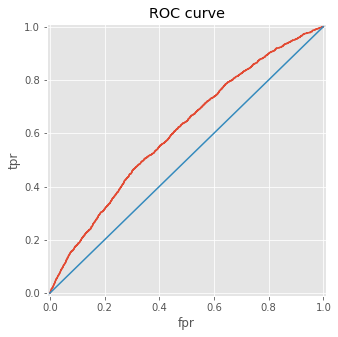

In [971]:
# Померить roc_auc на тесте
# Вывести текстом и на графике =)

## Your Code Here
fpr, tpr, thresholds = roc_curve(y_final_test, predict_proba[:,1])
plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1])
plt.ylabel('tpr')
plt.xlabel('fpr')
plt.grid(True)
plt.title('ROC curve')
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))
pass

In [972]:
roc_auc_score(y_final_test, predict_proba[:,1])

0.6082023294686681

### Больше обязательных заданий нет, но ниже вы можете провести исследование, поиграться с данными
### Это возможность написать код, который я посмотрю и в случае чего откомметирую. ;)
### Это не оценивается и остается на ваше усмотрение. Просто дополнительная возможность

In [973]:
### И далее ;)
# Эх, хотел че-нить замутить, но не успел, спасибо. ;)